In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
Excel_File = 'MA_Stock_Table.xlsx'

In [3]:
sheet=pd.read_excel(io=Excel_File)

In [4]:
#删除空白列
sheet.dropna(axis=1,how='any',inplace = True)

In [5]:
#替换AcgPro至TarCity列的'province','city'为空，并去除两端的空字符
for cl in ['AcgPro','ACGCity','TarPro','TarCity']:
    sheet[cl] = sheet[cl].str.replace('\(province\)|\(city\)','',case=False).str.strip()

<ipython-input-5-e2b9e3fee24c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sheet[cl] = sheet[cl].str.replace('\(province\)|\(city\)','',case=False).str.strip()


In [6]:
#用 0 填充 NaN
sheet = sheet.fillna(0)

In [7]:
sheet.to_excel('2016.xlsx')

In [8]:
#城市与省份词云分析
from wordcloud import WordCloud

In [9]:
text_AcgCity = '' #存储AcgCity
text_AcgPro = '' #存储AcgProvince
text_TarCity= ''
text_TarPro= ''
list_argument = ['ACGCity','AcgPro','TarCity','TarPro']

def text_deal(text:str,argument:str):
    for i in range(len(sheet)):
            text += (str(sheet[argument][i])+ ' ')
    return text

text_AcgCity = text_deal(text_AcgCity,list_argument[0])
text_AcgPro = text_deal(text_AcgPro,list_argument[1])
text_TarCity = text_deal(text_TarCity,list_argument[2])
text_TarPro = text_deal(text_TarPro,list_argument[3])

In [10]:
def show_savefile(x,filepath=None):
    plt.axis('off')
    plt.imshow(x)
    if filepath != None:
        x.to_file(filepath)

In [11]:
Functionwc = lambda x :WordCloud(background_color='white',width=1500,height=1500,stopwords=['0']).generate(x)
WC_AcgCity = Functionwc(text_AcgCity)
WC_AcgPro = Functionwc(text_AcgPro)
WC_TarCity = Functionwc(text_TarCity)
WC_TarPro = Functionwc(text_TarPro)

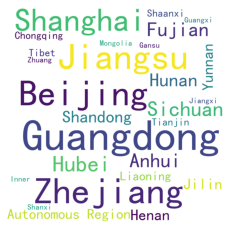

In [12]:
show_savefile(WC_AcgCity,)
show_savefile(WC_AcgPro)
show_savefile(WC_TarCity)
show_savefile(WC_TarPro)

#导出词云分析图，如有需求则进行保存

In [13]:
sheet = sheet.set_index('Symbol')

In [14]:
sheet['ACGCity'].value_counts()

Beijing      34
Shenzhen     27
Shanghai     21
Hangzhou     13
Guangzhou    13
             ..
Fenghua       1
Jingzhou      1
Guigang       1
Yancheng      1
Kaifeng       1
Name: ACGCity, Length: 102, dtype: int64

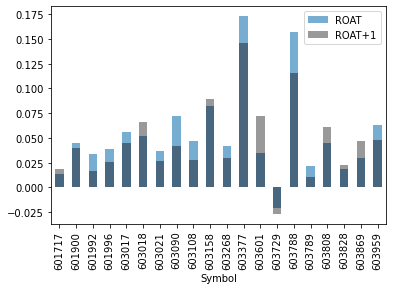

In [15]:
sheet['ROA'][-20:].plot.bar(alpha=0.6,label = 'ROAT')
sheet['ROAT+1'][-20:].plot.bar(color='k',alpha=0.4,label='ROAT+1')
plt.legend(loc='best')

In [16]:
pd.options.display.max_columns =None
pd.options.display.max_rows = None

In [17]:
sheet.index = sheet.index.astype(str)

In [18]:
new_index_symbol=[]

In [19]:
for i in range(len(sheet)):
    new_index_symbol.append( sheet.index[i].zfill(6))

In [20]:
symbol = new_index_symbol

In [21]:
sheet.reset_index(inplace=True)

In [22]:
del sheet['Symbol']

In [23]:
sheet.index=symbol

In [24]:
time = sheet.loc['000150'][7:48]
stockROE = sheet.loc['000150'][48:89]

In [25]:
stockROE = stockROE.reset_index()

In [26]:
del stockROE['index']

In [27]:
time = time.reset_index()
del time['index']

In [28]:
stockROE['time']=time

In [29]:
stockROE.set_index('time',inplace = True)

Text(0, 1, 'ROA')

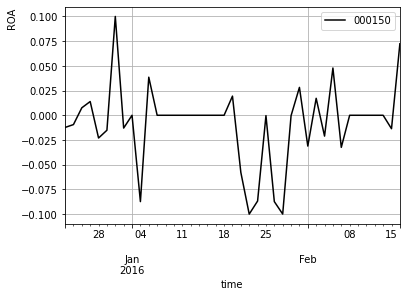

In [30]:
stockROE.plot.line(label='ROE',color = 'black')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('ROA',loc='top')

In [31]:
sheet.columns

Index([         'EventID', 'FirstDeclareDate',               'YT',
                    'Y+1',            'Month',              'Day',
           'Fdecia(date)',                -20,                -19,
                      -18,                -17,                -16,
                      -15,                -14,                -13,
                      -12,                -11,                -10,
                       -9,                 -8,                 -7,
                       -6,                 -5,                 -4,
                       -3,                 -2,                 -1,
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                

<AxesSubplot:>

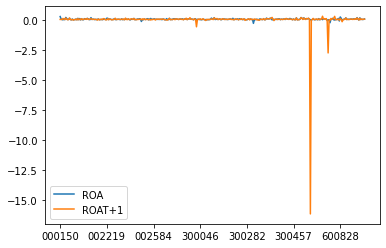

In [32]:
sheet[['ROA','ROAT+1']].plot()
#发现异常数据，进行剔除

In [33]:
sheet[(sheet['ROAT+1']<-15)==True]
tmp = sheet[sheet['ROAT+1']<-15]
sheet.drop(tmp.index,inplace=True)

In [34]:
tmp = sheet[sheet['ROAT+1']<-2.5]
sheet.drop(tmp.index,inplace=True)

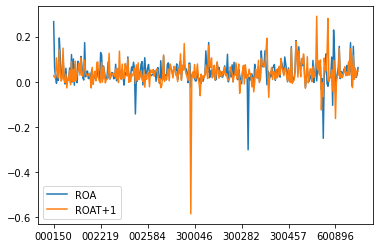

In [35]:
sheet[['ROA','ROAT+1']].plot()
tmp = sheet[sheet['ROAT+1']<-0.2]
sheet.drop(tmp.index,inplace=True)
tmp = sheet[sheet['ROA']<-0.1]
sheet.drop(tmp.index,inplace=True)
tmp = sheet[sheet['ROET']<-0.1]
sheet.drop(tmp.index,inplace=True)
tmp = sheet[sheet['ROET+1']<-0.2]
sheet.drop(tmp.index,inplace=True)
tmp = sheet[sheet['ROET']>0.3]
sheet.drop(tmp.index,inplace=True)
tmp = sheet[sheet['ROET+1']>0.25]
sheet.drop(tmp.index,inplace=True)

<AxesSubplot:>

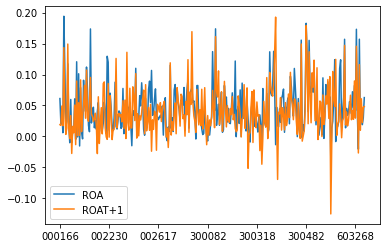

In [36]:
sheet[['ROA','ROAT+1']].plot()

<AxesSubplot:>

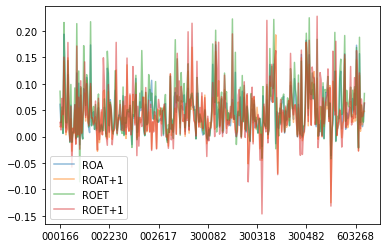

In [37]:
sheet[['ROA','ROAT+1','ROET','ROET+1']].plot(alpha=0.5)

In [38]:
sheet['ROE']=sheet['ROET']

In [39]:
import seaborn as sns;sns.set()

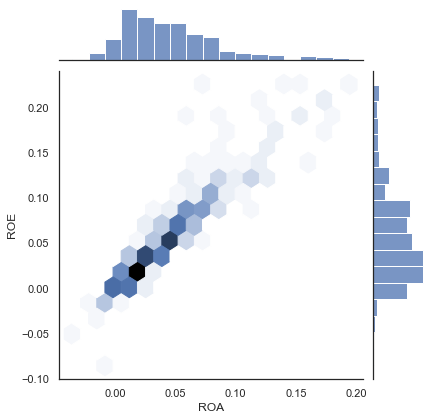

In [40]:
#联合分布
with sns.axes_style('white'):
    sns.jointplot(x='ROA',y='ROE',data=sheet,kind='hex')

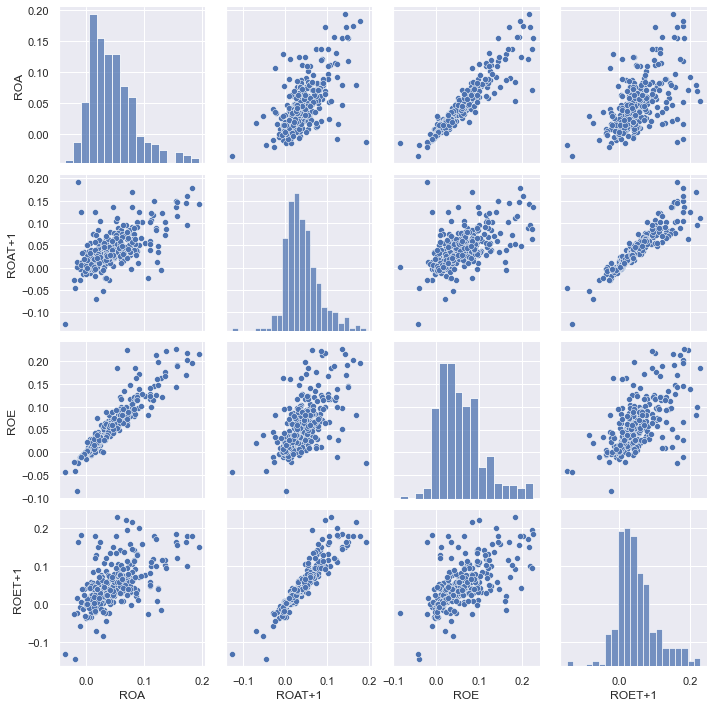

In [41]:
#ROA ROE四变量矩阵图
sns.pairplot(sheet[['ROA','ROAT+1','ROE','ROET+1']]);

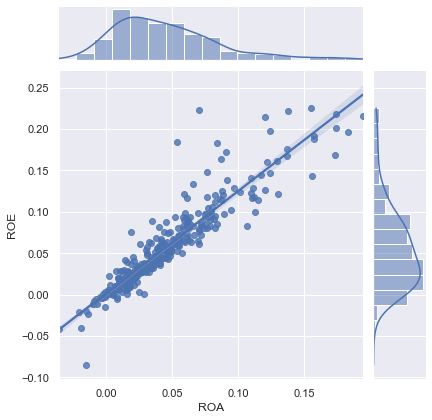

In [42]:
#使用自动KDE与回归的联合分布图
ax = sns.jointplot(x='ROA',y='ROE',kind='reg',data=sheet,);
ax.savefig('jointplot of ROA and ROE.jpg')

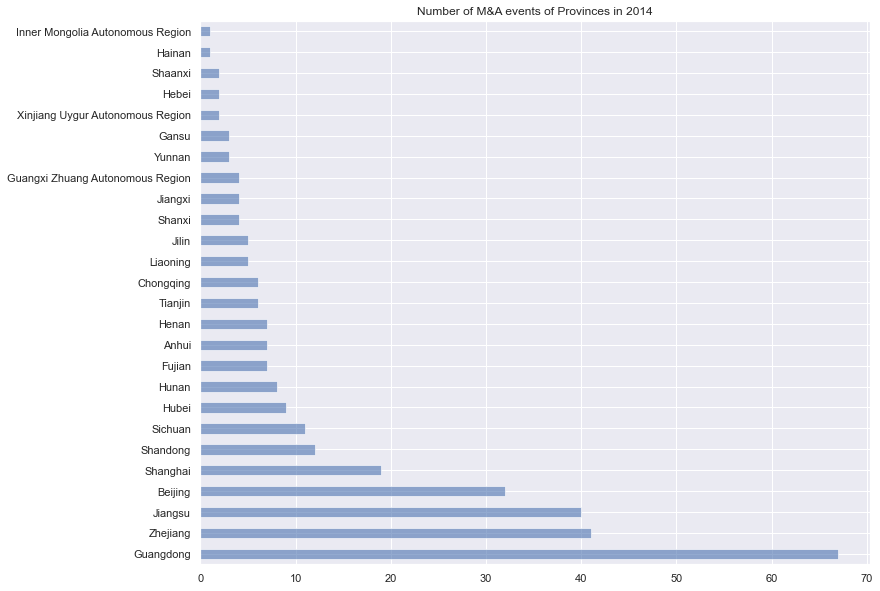

In [43]:
#统计各个省份出现的数量，去除值为0的
tmp = sheet[sheet['AcgPro']==0]
plt.figure(figsize=(12,10))
sheet.drop(tmp.index)['AcgPro'].value_counts().plot(kind='barh',alpha=0.6,title='Number of M&A events of Provinces in 2014')
plt.savefig('M&AEventsofProvinces.jpg')

In [44]:
#ROA ROE变化率
sheet['ROA_Change_Rate']=sheet['ROAT+1']/sheet['ROA']
sheet['ROE_Change_Rate']=sheet['ROET+1']/sheet['ROE']

In [45]:
sheet[['ROA_Change_Rate','ROE_Change_Rate']].describe()

,ROA_Change_Rate,ROE_Change_Rate
count,310.000000,310.000000
mean,0.849970,0.827440
std,4.499358,5.049780
min,-50.529412,-45.767473
25%,0.482301,0.406846
50%,0.873059,0.792856
75%,1.294846,1.271444
max,36.396175,37.012417


<AxesSubplot:title={'center':'ROA,ROE,Groupby City'}, ylabel='AcgPro'>

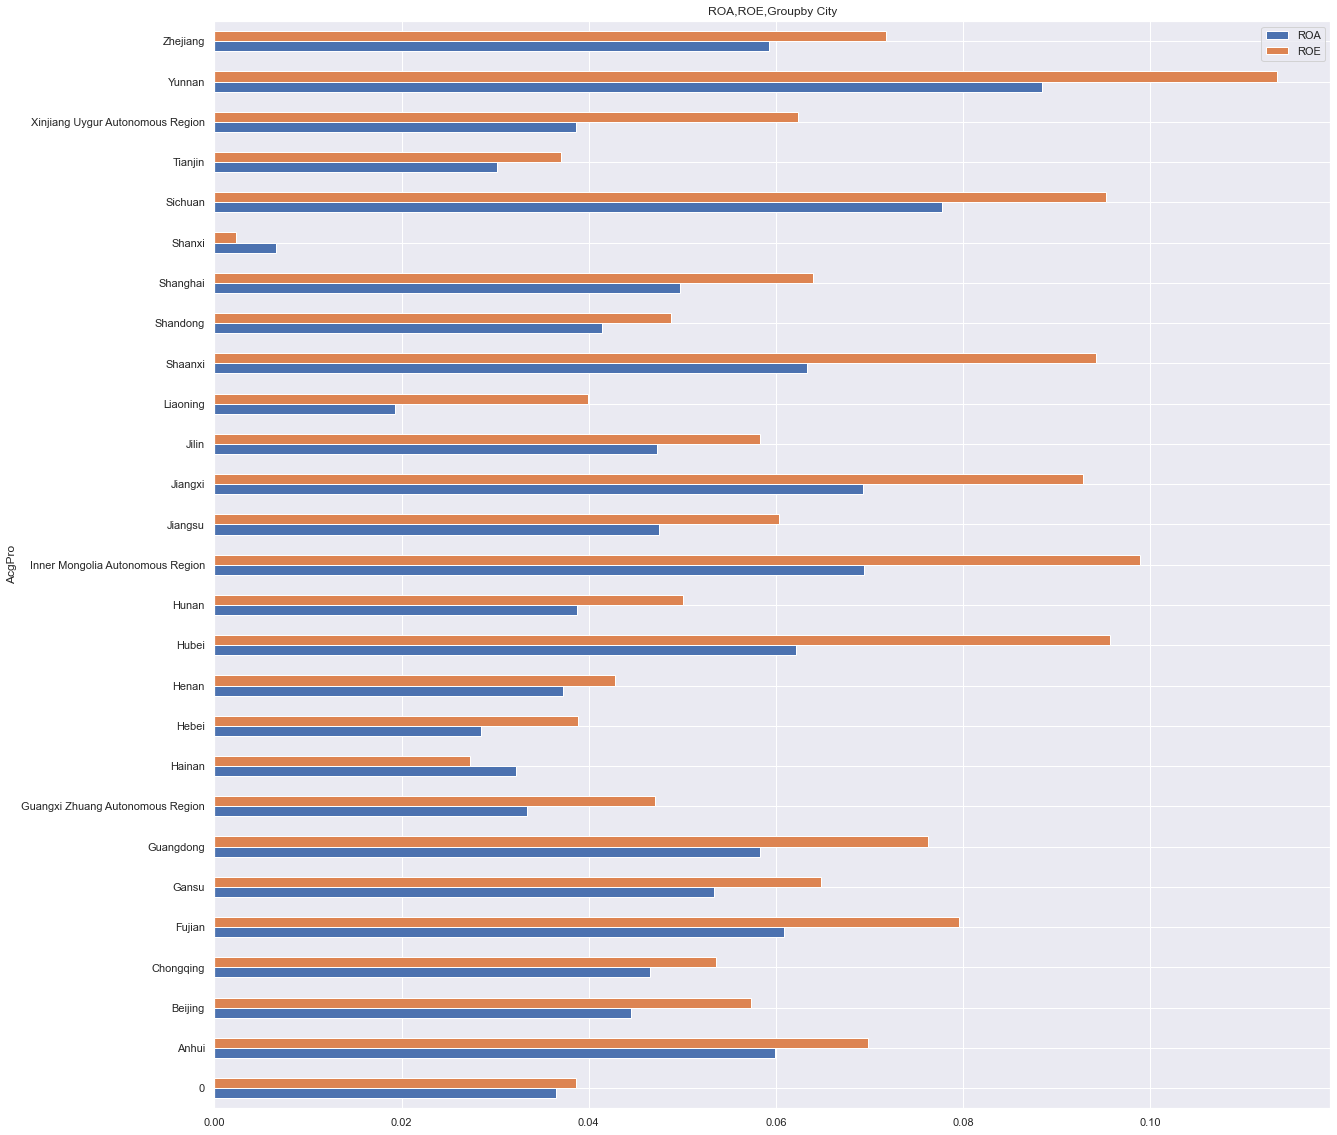

In [59]:
sheet.groupby('AcgPro').mean()[['ROA','ROE']].plot(kind='barh',figsize=(20,20),title='ROA,ROE,Groupby City')

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


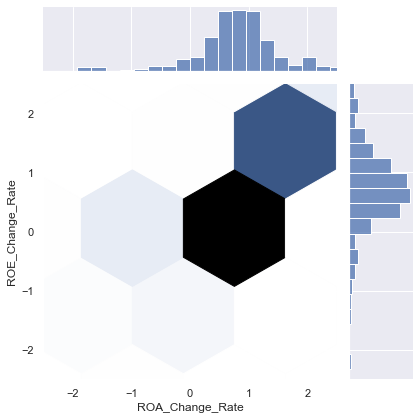

In [47]:
g = sns.jointplot('ROA_Change_Rate','ROE_Change_Rate',sheet,kind='hex',xlim=(-2.5,2.5),ylim=(-2.5,2.5),ratio=4)

In [48]:
sheet['ROA/ROE']=sheet['ROA']/sheet['ROET']
sheet['ROA/ROET+1']=sheet['ROAT+1']/sheet['ROET+1']

In [49]:
sheet[['ROA/ROE','ROA/ROET+1']].describe()

,ROA/ROE,ROA/ROET+1
count,310.000000,310.000000
mean,0.972604,1.620350
std,2.658969,6.849421
min,-18.165468,-8.992455
25%,0.690102,0.690897
50%,0.821913,0.864689
75%,0.955264,1.007826
max,39.593361,83.268293


In [50]:
#清理异常数据
sheet[['ROA_Change_Rate','ROE_Change_Rate']].describe()
sheet=sheet.drop(sheet[sheet['ROA_Change_Rate']>2.9].index)
sheet=sheet.drop(sheet[sheet['ROA_Change_Rate']<-1.5].index)
sheet=sheet.drop(sheet[sheet['ROE_Change_Rate']>4].index)
sheet=sheet.drop(sheet[sheet['ROE_Change_Rate']<-2.5].index)

In [51]:
sheet[['ROA_Change_Rate','ROE_Change_Rate']].describe()

,ROA_Change_Rate,ROE_Change_Rate
count,264.000000,264.000000
mean,0.868148,0.827513
std,0.642663,0.734355
min,-1.475359,-1.385185
25%,0.506457,0.421096
50%,0.837687,0.777972
75%,1.160118,1.145690
max,2.791226,3.674306


In [63]:
X = sheet[['ROA','ROE']]

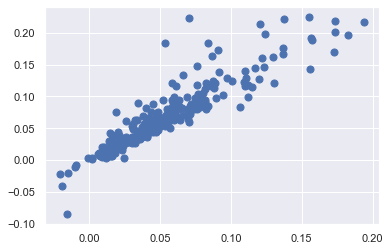

In [64]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],s=50)

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

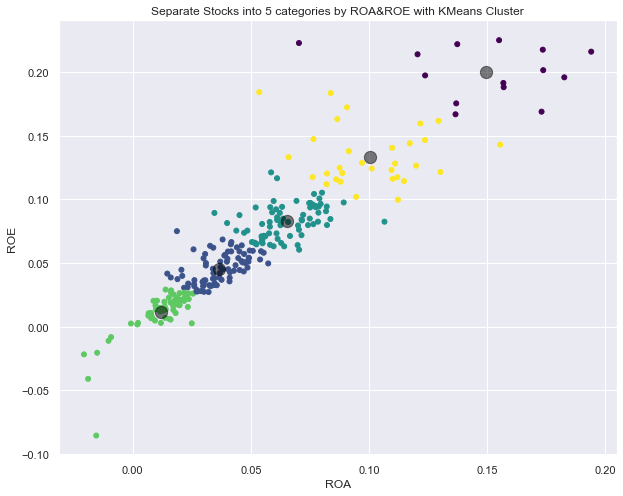

In [72]:
y_means=kmeans.predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_means,s=25,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=150,alpha=0.5)
plt.xlabel('ROA')
plt.ylabel('ROE')
plt.title('Separate Stocks into 5 categories by ROA&ROE with KMeans Cluster');
plt.savefig('KMeans cluster result')

**高斯混合模型**

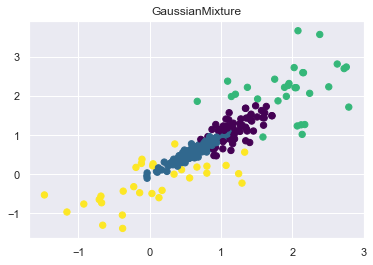

In [56]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4,covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=labels,s=40,cmap='viridis');
plt.title('GaussianMixture');